In [ ]:
!pip install networkx
!pip install numpy
!pip install pandas
!pip install matplotlib.pyplot

In [5]:
!pip uninstall torch torchvision torchtext torchdata torchaudio --yes
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0


Found existing installation: torch 2.1.0
Uninstalling torch-2.1.0:
  Successfully uninstalled torch-2.1.0
Found existing installation: torchvision 0.16.0
Uninstalling torchvision-0.16.0:
  Successfully uninstalled torchvision-0.16.0
Found existing installation: torchaudio 2.1.0
Uninstalling torchaudio-2.1.0:
  Successfully uninstalled torchaudio-2.1.0
  Using cached torch-2.1.0-cp310-cp310-manylinux1_x86_64.whl (670.2 MB)
  Using cached torchvision-0.16.0-cp310-cp310-manylinux1_x86_64.whl (6.9 MB)
  Using cached torchaudio-2.1.0-cp310-cp310-manylinux1_x86_64.whl (3.3 MB)


In [1]:
import os
import torch
import networkx as nx
import pandas
print("Using torch", torch.__version__)

Using torch 2.1.0+cu121


In [2]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.1.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.1/932.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.7 MB/s eta 0:00:00


In [3]:
import torch_cluster
from torch_geometric.nn import Node2Vec
import os.path as osp
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import numpy as np

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
import pickle
def load_data(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data

In [6]:

email_data2 = load_data('/content/gdrive/My Drive/email_data2.pkl')

In [58]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Node2Vec(email_data2.edge_index, embedding_dim=16, walk_length=20,
             context_size=10, walks_per_node=10,
             num_negative_samples=1, p=1, q=1, sparse=True).to(device)

loader = model.loader(batch_size=16, shuffle=True, num_workers=2)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr= 2e-5)
#optimizer = torch.optim.Adam(model.parameters(), lr=2e-5, weight_decay=5e-4)


Epoch: 01, Loss: 1.2402, Accuracy: 0.9139
Epoch: 02, Loss: 1.2426, Accuracy: 0.9139
Epoch: 03, Loss: 1.2416, Accuracy: 0.9139
Epoch: 04, Loss: 1.2373, Accuracy: 0.9139
Epoch: 05, Loss: 1.2372, Accuracy: 0.9139
Epoch: 06, Loss: 1.2349, Accuracy: 0.9139
Epoch: 07, Loss: 1.2353, Accuracy: 0.9139
Epoch: 08, Loss: 1.2381, Accuracy: 0.9139
Epoch: 09, Loss: 1.2351, Accuracy: 0.9139
Epoch: 10, Loss: 1.2335, Accuracy: 0.9139
Epoch: 11, Loss: 1.2337, Accuracy: 0.9139
Epoch: 12, Loss: 1.2319, Accuracy: 0.9139
Epoch: 13, Loss: 1.2328, Accuracy: 0.9139
Epoch: 14, Loss: 1.2286, Accuracy: 0.9139
Epoch: 15, Loss: 1.2290, Accuracy: 0.9139
Epoch: 16, Loss: 1.2295, Accuracy: 0.9139
Epoch: 17, Loss: 1.2278, Accuracy: 0.9139
Epoch: 18, Loss: 1.2266, Accuracy: 0.9139
Epoch: 19, Loss: 1.2278, Accuracy: 0.9139
Epoch: 20, Loss: 1.2275, Accuracy: 0.9139
Epoch: 21, Loss: 1.2225, Accuracy: 0.9139
Epoch: 22, Loss: 1.2207, Accuracy: 0.9139
Epoch: 23, Loss: 1.2217, Accuracy: 0.9139
Epoch: 24, Loss: 1.2227, Accuracy:

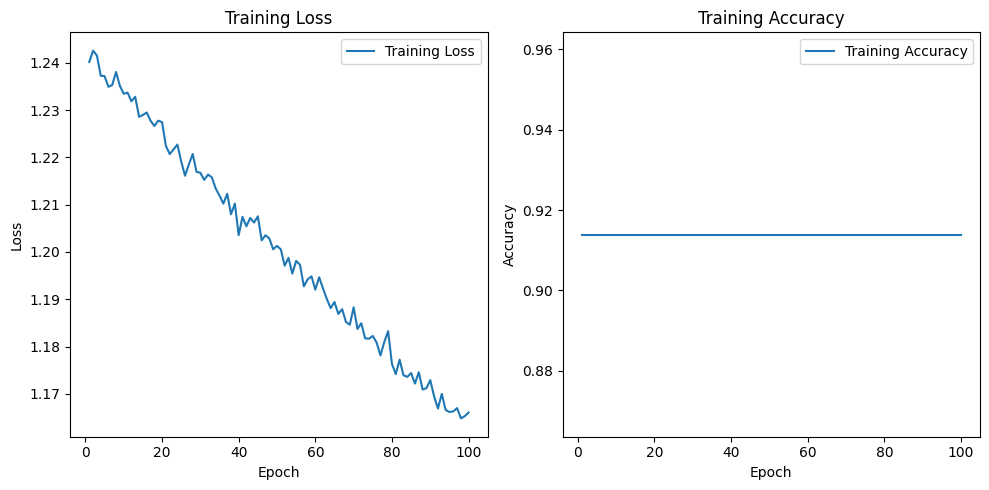

Epoch: 01, Loss: 1.1647, Accuracy: 0.9139
Epoch: 02, Loss: 1.1636, Accuracy: 0.9139
Epoch: 03, Loss: 1.1627, Accuracy: 0.9139
Epoch: 04, Loss: 1.1626, Accuracy: 0.9139
Epoch: 05, Loss: 1.1615, Accuracy: 0.9139
Epoch: 06, Loss: 1.1589, Accuracy: 0.9139
Epoch: 07, Loss: 1.1615, Accuracy: 0.9139
Epoch: 08, Loss: 1.1588, Accuracy: 0.9139
Epoch: 09, Loss: 1.1570, Accuracy: 0.9139
Epoch: 10, Loss: 1.1592, Accuracy: 0.9139
Epoch: 11, Loss: 1.1582, Accuracy: 0.9139
Epoch: 12, Loss: 1.1572, Accuracy: 0.9139
Epoch: 13, Loss: 1.1554, Accuracy: 0.9139
Epoch: 14, Loss: 1.1552, Accuracy: 0.9139
Epoch: 15, Loss: 1.1543, Accuracy: 0.9139
Epoch: 16, Loss: 1.1535, Accuracy: 0.9139
Epoch: 17, Loss: 1.1502, Accuracy: 0.9139
Epoch: 18, Loss: 1.1505, Accuracy: 0.9139
Epoch: 19, Loss: 1.1540, Accuracy: 0.9139
Epoch: 20, Loss: 1.1518, Accuracy: 0.9139
Epoch: 21, Loss: 1.1492, Accuracy: 0.9139
Epoch: 22, Loss: 1.1498, Accuracy: 0.9139
Epoch: 23, Loss: 1.1502, Accuracy: 0.9139
Epoch: 24, Loss: 1.1463, Accuracy:

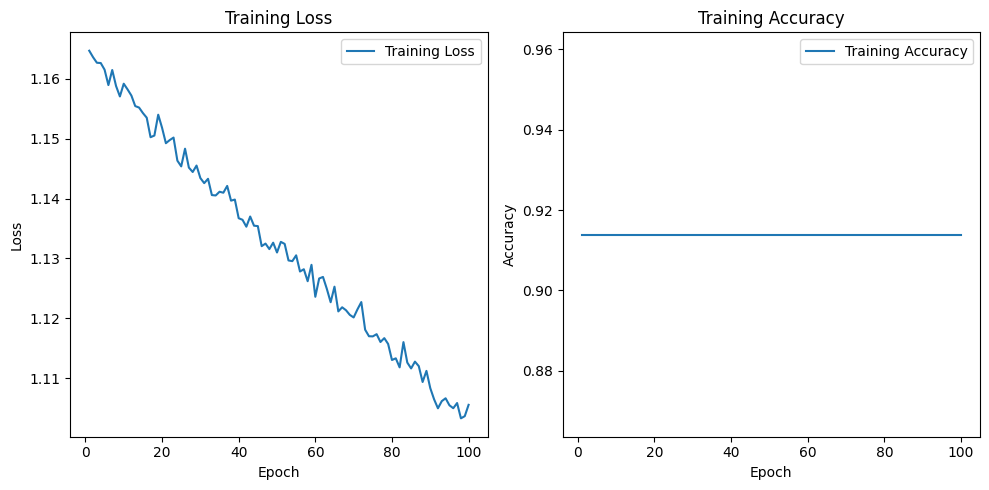

Epoch: 01, Loss: 1.1024, Accuracy: 0.9139
Epoch: 02, Loss: 1.1036, Accuracy: 0.9139
Epoch: 03, Loss: 1.1009, Accuracy: 0.9139
Epoch: 04, Loss: 1.1008, Accuracy: 0.9139
Epoch: 05, Loss: 1.1013, Accuracy: 0.9139
Epoch: 06, Loss: 1.0997, Accuracy: 0.9139
Epoch: 07, Loss: 1.1012, Accuracy: 0.9139
Epoch: 08, Loss: 1.0988, Accuracy: 0.9139
Epoch: 09, Loss: 1.0990, Accuracy: 0.9139
Epoch: 10, Loss: 1.0965, Accuracy: 0.9139
Epoch: 11, Loss: 1.0969, Accuracy: 0.9139
Epoch: 12, Loss: 1.0958, Accuracy: 0.9139
Epoch: 13, Loss: 1.0955, Accuracy: 0.9139
Epoch: 14, Loss: 1.0953, Accuracy: 0.9139
Epoch: 15, Loss: 1.0972, Accuracy: 0.9139
Epoch: 16, Loss: 1.0957, Accuracy: 0.9139
Epoch: 17, Loss: 1.0944, Accuracy: 0.9139
Epoch: 18, Loss: 1.0957, Accuracy: 0.9139
Epoch: 19, Loss: 1.0936, Accuracy: 0.9139
Epoch: 20, Loss: 1.0931, Accuracy: 0.9139
Epoch: 21, Loss: 1.0945, Accuracy: 0.9139
Epoch: 22, Loss: 1.0905, Accuracy: 0.9139
Epoch: 23, Loss: 1.0937, Accuracy: 0.9139
Epoch: 24, Loss: 1.0896, Accuracy:

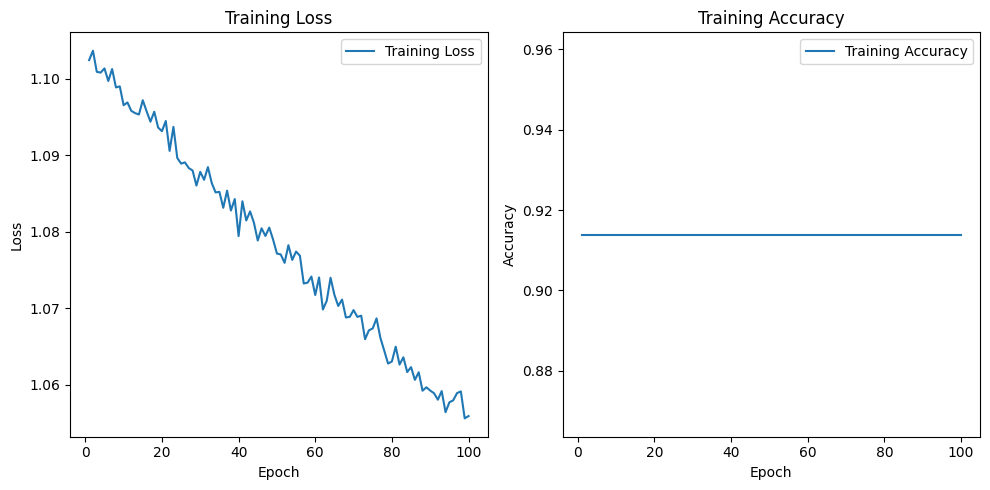

In [79]:
def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)


@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[email_data2.train_mask], email_data2.y[email_data2.train_mask],
                     z[email_data2.test_mask], email_data2.y[email_data2.test_mask],
                     max_iter=50)
    return acc


final_test_acc = []
final_loss=[]

for i in range(3):
  train_loss_values = []
  train_acc_values = []

  for epoch in range(1, 101):
      loss = train()
      acc = test()
      train_loss_values.append(loss)
      train_acc_values.append(acc)

      print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Accuracy: {acc:.4f}' )

  # Plotting
  epochs_range = range(1, 101)

  plt.figure(figsize=(10, 5))

  # Plotting loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, train_loss_values, label='Training Loss')
  plt.title('Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # Plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, train_acc_values, label='Training Accuracy')
  plt.title('Training Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

  final_test_acc.append(acc)
  final_loss.append(loss)







In [80]:
final_test_acc= np.array(final_test_acc)
final_loss= np.array(final_loss)

# Mean
loss_mean_value = np.mean(final_loss)
acc_mean_value = np.mean(final_test_acc)
print(f"loss Mean: {loss_mean_value}")
print(f"Acc Mean: {acc_mean_value}")

# Max
loss_max_value = np.max(final_loss)
acc_max_value = np.max(final_test_acc)
print(f"loss_Max: {loss_max_value}")
print(f"acc_Max: {acc_max_value}")

# Standard Deviation
loss_std_dev = np.std(final_loss)
acc_std_dev = np.std(final_test_acc)
print(f"loss_Standard Deviation: {loss_std_dev}")
print(f"acc_Standard Deviation: {acc_std_dev}")

loss Mean: 1.10916431618746
Acc Mean: 0.913907284768212
loss_Max: 1.1660436278297788
acc_Max: 0.9139072847682119
loss_Standard Deviation: 0.04503097914299082
acc_Standard Deviation: 1.1102230246251565e-16
